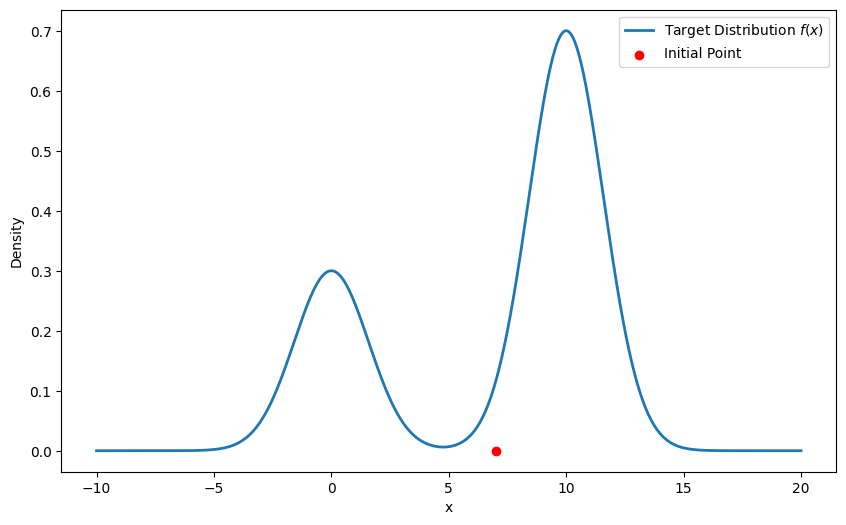

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def target_distribution(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

x = np.linspace(-10, 20, 1000)
target_pdf = target_distribution(x)
initial_point = 7

plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution $f(x)$', linewidth=2)
plt.scatter(initial_point, 0, color='red', label='Initial Point')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

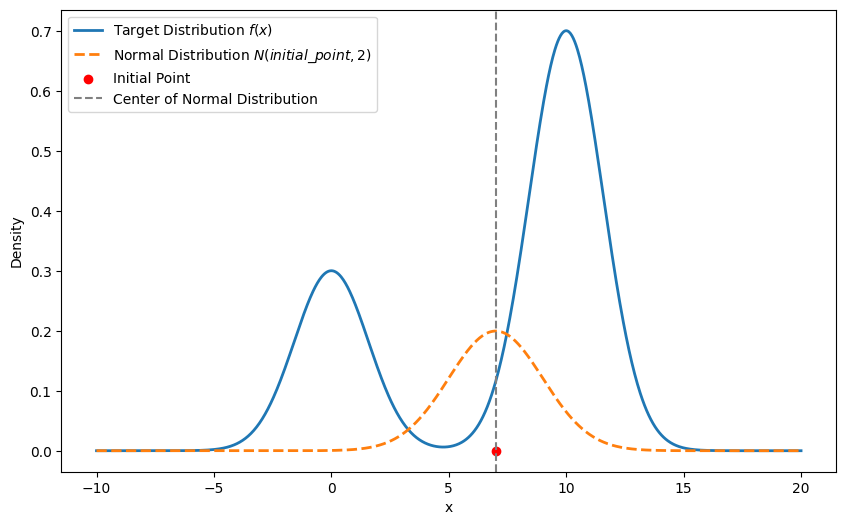

In [18]:
# 재실행을 위해 필요한 라이브러리와 정의를 다시 불러오기
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 정의된 목표 분포 함수
def target_distribution(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

x = np.linspace(-10, 20, 1000)
target_pdf = target_distribution(x)
initial_point = 7

# 초기 포인트를 중심으로 하는 정규 분포
normal_dist = norm.pdf(x, initial_point, 2)

plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution $f(x)$', linewidth=2)
plt.plot(x, normal_dist, label='Normal Distribution $N(initial\_point, 2)$', linewidth=2, linestyle='--')
plt.scatter(initial_point, 0, color='red', label='Initial Point')
plt.axvline(x=initial_point, color='gray', linestyle='--', label='Center of Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

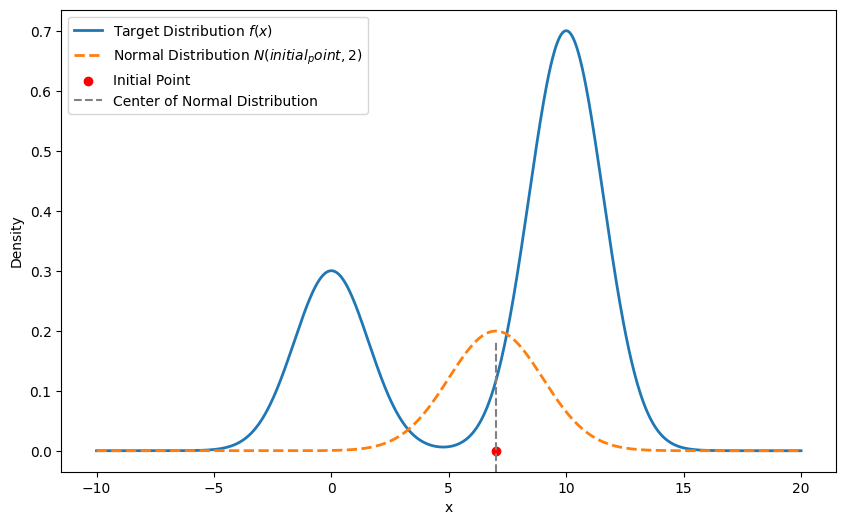

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution $f(x)$', linewidth=2)
plt.plot(x, normal_dist, label='Normal Distribution $N(initial_point, 2)$', linewidth=2, linestyle='--')
plt.scatter(initial_point, 0, color='red', label='Initial Point')

# 정규 분포의 최대 높이를 계산
normal_dist_max_height = norm.pdf(initial_point, initial_point, 2)

# 정규 분포의 중심선을 높이까지만 표시하기 위해 y축의 최대값을 계산
y_max = max(max(target_pdf), normal_dist_max_height)

# y축 상에서의 정규 분포의 높이 비율 계산
height_ratio = normal_dist_max_height / y_max

plt.axvline(x=initial_point, ymin=0, ymax=height_ratio, color='gray', linestyle='--', label='Center of Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [19]:
# 목표 분포와 정규 분포에서 신규 포인트를 랜덤하게 추천받고 조건에 따라 accept하는 코드

def accept_new_point(x_0, target_distribution):
    # x_0 주변에서 정규 분포를 사용하여 신규 포인트 x_1 생성
    x_1 = np.random.normal(x_0, 2)
    
    # 목표 분포에서의 x_0 및 x_1의 확률 밀도 계산
    f_x_0 = target_distribution(x_0)
    f_x_1 = target_distribution(x_1)
    
    # 조건 검사: f(x_1) / f(x_0) > 1 이면 x_1을 accept
    if f_x_1 / f_x_0 > 1:
        return x_1, True  # 신규 포인트와 accept 여부 반환
    else:
        return x_1, False  # 신규 포인트와 reject 여부 반환

# 초기 포인트 설정
initial_point = 7

# 신규 포인트 추천 및 조건에 따른 accept 여부 확인
new_point, is_accepted = accept_new_point(initial_point, target_distribution)

# 결과 출력
print(f"Initial Point: {initial_point}")
print(f"New Point: {new_point}")
print(f"Accepted: {is_accepted}")

Initial Point: 7
New Point: 5.460985365896314
Accepted: False


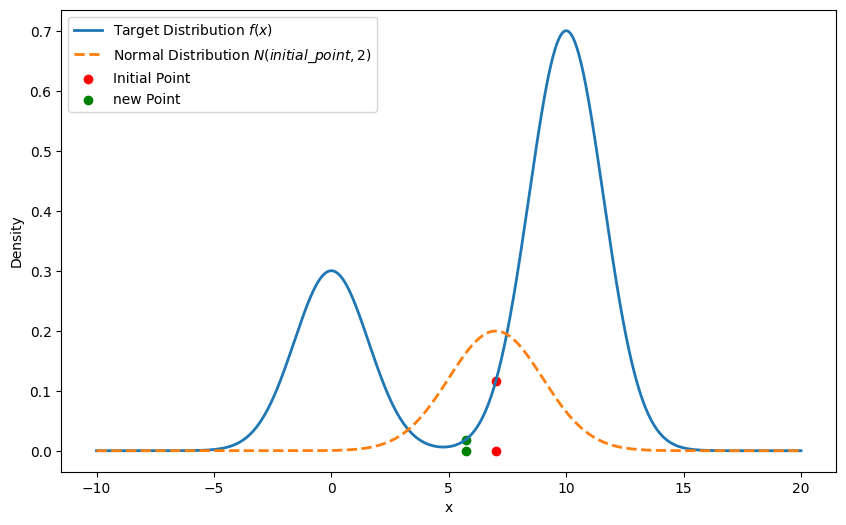

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def target_distribution(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

x = np.linspace(-10, 20, 1000)
target_pdf = target_distribution(x)
initial_point = 7

normal_dist = norm.pdf(x, initial_point, 2)

def recommend(x_0, target_distribution):
    x_1 = np.random.normal(x_0, 2)
    
    f_x_0 = target_distribution(x_0)
    f_x_1 = target_distribution(x_1)
    
    if f_x_1 / f_x_0 > 1:
        return (x_0, f_x_0), (x_1, f_x_1), True
    else:
        return (x_0, f_x_0), (x_1, f_x_1), False
    
initial_points, new_points, is_accepted = recommend(initial_point, target_distribution)

plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution $f(x)$', linewidth=2)
plt.plot(x, normal_dist, label='Normal Distribution $N(initial\_point, 2)$', linewidth=2, linestyle='--')
plt.scatter(initial_points[0], 0, color='red')
plt.scatter(initial_points[0], initial_points[1], color='red', label='Initial Point')
plt.scatter(new_points[0], 0, color='green')
plt.scatter(new_points[0], new_points[1], color='green', label='new Point')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

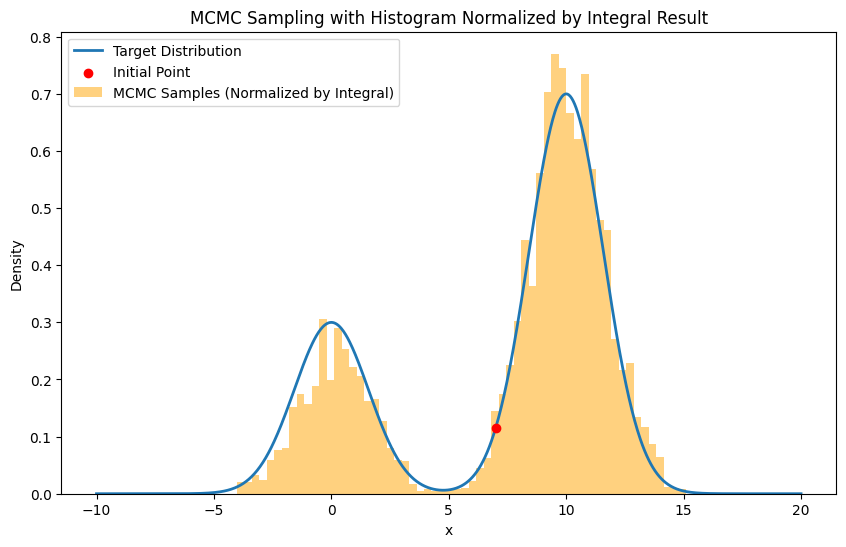

In [122]:
# 필요한 라이브러리 재설정
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad


# 목표 분포 정의
def target_distribution(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

x_domain = [-7, 17]

# MCMC Metropolis 알고리즘 정의
def metropolis_algorithm(target_distribution, initial_point, num_samples, step_size=2):
    samples = [initial_point]
    current_point = initial_point

    for i in range(num_samples - 1):
        new_point = np.random.normal(current_point, step_size)
        if x_domain[0] <= new_point <= x_domain[1]:
            f_current = target_distribution(current_point)
            f_new = target_distribution(new_point)
            acceptance_ratio = f_new / f_current

            u = np.random.uniform(0, 1)
            if acceptance_ratio > u:
                samples.append(new_point)
                current_point = new_point
            else:
                samples.append(current_point)
        else:
            samples.append(current_point)

    return samples

# 실행 매개변수 설정
num_samples = 5000
initial_point = 7

# 알고리즘 실행
samples = metropolis_algorithm(target_distribution, initial_point, num_samples)

# -7부터 17까지 목표 분포의 적분 계산
integral_result, _ = quad(target_distribution, x_domain[0], x_domain[1])

integral_result

# 샘플 히스토그램 생성 (정규화 없이)
counts, bin_edges = np.histogram(samples, bins=int(30 / 0.5), density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 적분 결과를 사용하여 히스토그램 정규화
total_samples = len(samples)
normalized_counts = (counts / total_samples) * (integral_result / np.diff(bin_edges))

plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution', linewidth=2)
plt.bar(bin_centers, normalized_counts, width=np.diff(bin_edges)[0], alpha=0.5, color='orange', label='MCMC Samples (Normalized by Integral)')
plt.scatter(initial_point, target_distribution(initial_point), color='red', zorder=5, label='Initial Point')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('MCMC Sampling with Histogram Normalized by Integral Result')
plt.show()